In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import sys
import rebound
sys.path.insert(1, '../SPOCKalt')
import plotFunctions
import simsetup

In [3]:
dataset = pd.read_csv('../modeldata/trythetaSTD.csv')

In [4]:
dataset

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time
0,0,2.049650,0.013679,0.234941,0.002188,0.974706,1.808635,1.350010,1.483755,0.221502,0.300893,0.589043,True,False,1.235665e+07,8.315223e+07
1,1,1.938160,0.076051,0.388864,0.001233,0.069950,1.792445,1.299174,1.663194,0.190647,0.403777,0.671403,True,False,1.348749e+05,2.133072e+05
2,2,1.997951,0.002335,0.141684,0.004603,0.999966,0.775818,1.194251,2.256854,0.125660,0.720557,0.936762,True,False,1.276428e+04,9.321863e+03
3,3,1.993565,0.004385,0.076984,0.000052,0.329016,0.620747,1.342041,1.373228,0.216684,0.235460,0.503164,True,True,1.000000e+09,1.000000e+09
4,4,NaN,NaN,NaN,NaN,0.121660,NaN,1.051520,1.036905,0.024455,0.034058,0.059346,False,False,8.791890e+01,8.791890e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,138538,2.008604,0.003245,3.814043,0.068524,0.026189,0.126759,2.146925,1.125825,0.082222,0.664222,0.801058,True,False,6.990387e+05,8.267916e+05
138539,138539,1.891461,0.041741,0.204071,0.000258,0.100165,0.468492,1.399777,1.435985,0.251338,0.272822,0.592730,True,False,3.075749e+08,6.576003e+08
138540,138540,2.099445,0.049722,0.563941,0.005761,0.996531,0.208790,1.204069,1.597688,0.131799,0.366664,0.546790,True,False,1.193822e+07,3.363291e+07
138541,138541,1.786383,0.089323,0.122812,0.000538,0.998344,0.479796,1.330065,1.647766,0.209454,0.395073,0.687277,True,False,2.064407e+08,4.316851e+07


In [5]:
def hasnull(row):
    numnulls = row.isnull().sum()
    if numnulls == 0:
        return 0
    else:
        return 1

def tmax(row):
    #sim = get_sim(row, csvfolder)
    tmax = 1e4 # replace with a calculation of tmax
    return tmax

In [6]:
%%time
if 'hasnull' not in dataset.columns:
    dataset['hasnull'] = dataset.apply(hasnull, axis=1)
    #dataset['tmax'] = dataset.apply(tmax, axis=1)
    # dataset['tmax'] = dataset.apply(lambda x:1e4, axis=1) # this version would just set tmax=1e4 for all of them

    #dataset.to_csv(trainingdatafolder+"trainingdata.csv", encoding='ascii')

CPU times: user 5.85 s, sys: 23.2 ms, total: 5.87 s
Wall time: 5.87 s


In [7]:
mask = (dataset['hasnull'] == 0 )
filtData = dataset[mask]

In [8]:
filtData

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull
0,0,2.049650,0.013679,0.234941,0.002188,0.974706,1.808635,1.350010,1.483755,0.221502,0.300893,0.589043,True,False,1.235665e+07,8.315223e+07,0
1,1,1.938160,0.076051,0.388864,0.001233,0.069950,1.792445,1.299174,1.663194,0.190647,0.403777,0.671403,True,False,1.348749e+05,2.133072e+05,0
2,2,1.997951,0.002335,0.141684,0.004603,0.999966,0.775818,1.194251,2.256854,0.125660,0.720557,0.936762,True,False,1.276428e+04,9.321863e+03,0
3,3,1.993565,0.004385,0.076984,0.000052,0.329016,0.620747,1.342041,1.373228,0.216684,0.235460,0.503164,True,True,1.000000e+09,1.000000e+09,0
5,5,2.005946,0.003046,0.071558,0.000018,0.213067,1.814179,1.963686,1.906146,0.537356,0.568136,1.410783,True,True,1.000004e+09,1.000004e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,138538,2.008604,0.003245,3.814043,0.068524,0.026189,0.126759,2.146925,1.125825,0.082222,0.664222,0.801058,True,False,6.990387e+05,8.267916e+05,0
138539,138539,1.891461,0.041741,0.204071,0.000258,0.100165,0.468492,1.399777,1.435985,0.251338,0.272822,0.592730,True,False,3.075749e+08,6.576003e+08,0
138540,138540,2.099445,0.049722,0.563941,0.005761,0.996531,0.208790,1.204069,1.597688,0.131799,0.366664,0.546790,True,False,1.193822e+07,3.363291e+07,0
138541,138541,1.786383,0.089323,0.122812,0.000538,0.998344,0.479796,1.330065,1.647766,0.209454,0.395073,0.687277,True,False,2.064407e+08,4.316851e+07,0


In [9]:
plot = filtData

In [10]:
plot['dup']=plot[['threeBRfillfac','EMcrossnear','instability_time','MEGNO']].duplicated()
plot = plot.drop(plot[plot['dup']==True].index)
plot = plot.drop(plot[plot['threeBRfillfac'] >20].index)
plot = plot.drop(plot[plot['nearThetaSTD']>2].index)
# plot = plot.drop(plot[plot['3/2_order']>70].index)
# plot = plot.drop(plot[plot['MMRstrengthnear']<.5].index)


/tmp/ipykernel_40852/1002913531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['dup']=plot[['threeBRfillfac','EMcrossnear','instability_time','MEGNO']].duplicated()


In [11]:
plot

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup
0,0,2.049650,0.013679,0.234941,0.002188,0.974706,1.808635,1.350010,1.483755,0.221502,0.300893,0.589043,True,False,1.235665e+07,8.315223e+07,0,False
1,1,1.938160,0.076051,0.388864,0.001233,0.069950,1.792445,1.299174,1.663194,0.190647,0.403777,0.671403,True,False,1.348749e+05,2.133072e+05,0,False
2,2,1.997951,0.002335,0.141684,0.004603,0.999966,0.775818,1.194251,2.256854,0.125660,0.720557,0.936762,True,False,1.276428e+04,9.321863e+03,0,False
3,3,1.993565,0.004385,0.076984,0.000052,0.329016,0.620747,1.342041,1.373228,0.216684,0.235460,0.503164,True,True,1.000000e+09,1.000000e+09,0,False
5,5,2.005946,0.003046,0.071558,0.000018,0.213067,1.814179,1.963686,1.906146,0.537356,0.568136,1.410783,True,True,1.000004e+09,1.000004e+09,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138537,138537,11.855117,3.312267,0.974223,0.076465,0.451489,1.753085,1.500552,1.136822,0.089252,0.310694,0.427675,True,False,6.303165e+04,6.470086e+04,0,False
138538,138538,2.008604,0.003245,3.814043,0.068524,0.026189,0.126759,2.146925,1.125825,0.082222,0.664222,0.801058,True,False,6.990387e+05,8.267916e+05,0,False
138540,138540,2.099445,0.049722,0.563941,0.005761,0.996531,0.208790,1.204069,1.597688,0.131799,0.366664,0.546790,True,False,1.193822e+07,3.363291e+07,0,False
138541,138541,1.786383,0.089323,0.122812,0.000538,0.998344,0.479796,1.330065,1.647766,0.209454,0.395073,0.687277,True,False,2.064407e+08,4.316851e+07,0,False


In [12]:
import math
import numpy as np

In [13]:
import numpy as np
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = math.sqrt(-np.log(1-(x**(-1))))
    return p1+p2

In [14]:
plotfill(1.1)

2.5278175491242747

In [15]:
fillList = np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: (x)+5.5, y))

/tmp/ipykernel_40852/3515489751.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=((plot['nearThetaSTD'])), cmap=plt.cm.get_cmap("cool",10),vmin=0.5,vmax=1.75,alpha=.8)


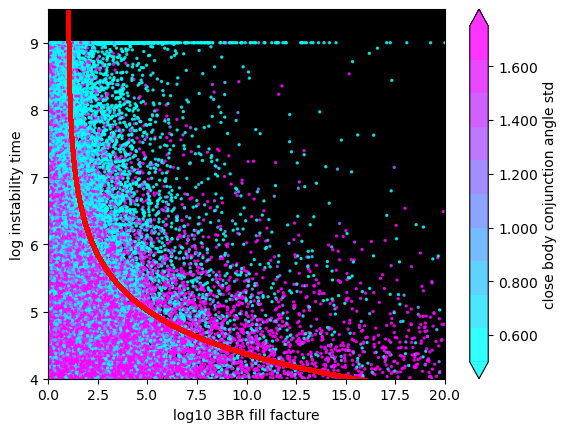

In [17]:
ax = plt.axes()
plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=((plot['nearThetaSTD'])), cmap=plt.cm.get_cmap("cool",10),vmin=0.5,vmax=1.75,alpha=.8)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("log10 3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")


In [36]:
temp=plot

In [37]:
temp=temp.drop(temp[temp['instability_time']<1e9].index)

In [38]:
temp=temp.drop(temp[temp['threeBRfillfac']<1].index)

In [39]:
temp=temp.drop(temp[np.log10(temp['nearThetaSTD']/1.8)<0].index)

In [40]:
temp

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup
616,616,2.100510,0.028308,1.094712,0.006091,0.293468,1.809059,1.086277,1.565048,0.056722,0.347998,0.424459,True,True,1.000000e+09,1.000000e+09,0,False
671,671,1.927572,0.014667,1.071709,0.003077,0.481175,1.808156,1.465440,1.134424,0.087720,0.290165,0.403339,True,True,1.000013e+09,1.000013e+09,0,False
754,754,30.805992,7.226020,1.123480,0.323842,0.012816,1.820736,1.446718,1.069633,0.045900,0.279155,0.337867,True,True,1.000000e+09,1.225344e+06,0,False
922,922,2.000664,0.000159,1.071392,0.006584,0.000600,1.800899,1.682303,1.360670,0.227940,0.414528,0.736955,True,True,1.000000e+09,1.000000e+09,0,False
1405,1405,1.998191,0.001456,1.556336,0.007813,0.061020,1.809210,1.363418,1.072671,0.047879,0.229568,0.288439,True,True,1.000001e+09,1.000001e+09,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117422,117422,1.996424,0.000552,1.076582,0.005265,0.753153,1.819418,1.317543,1.264706,0.169483,0.201838,0.405529,True,True,1.000000e+09,1.000000e+09,0,False
125217,125217,1.911929,0.052916,1.448771,0.036045,0.001993,1.812295,1.670244,1.241098,0.154889,0.407756,0.625803,True,True,1.000000e+09,1.000000e+09,0,False
129372,129372,2.007217,0.007392,1.122224,0.003864,0.876736,1.808198,1.156937,1.200287,0.102067,0.129424,0.244700,True,True,1.000000e+09,1.000000e+09,0,False
130066,130066,1.741831,0.225699,1.243023,0.011076,0.004682,1.815395,1.352710,1.097595,0.064049,0.223123,0.301463,True,True,1.000000e+09,1.000000e+09,0,False


/tmp/ipykernel_40852/2189497489.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(np.log10(temp['threeBRfillfac']),np.log10(temp['instability_time']), s=10, c=(np.log10(temp['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("spring",20),alpha=1)


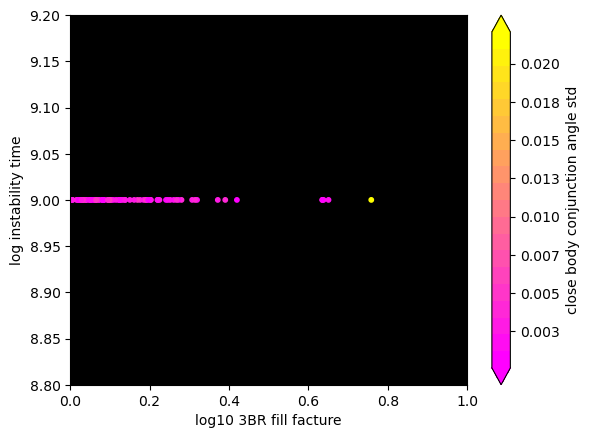

In [42]:
ax = plt.axes()
plt.scatter(np.log10(temp['threeBRfillfac']),np.log10(temp['instability_time']), s=10, c=(np.log10(temp['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("spring",20),alpha=1)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')

ax.set_xlim([0,1])
ax.set_ylim([8.8,9.2])
plt.xlabel("log10 3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")

In [35]:
initial = pd.read_csv('../modeldata/originalCondAllData.csv')

In [32]:
def getval( Pratio: list):
    maxorder = 9
    delta = 0.03
    minperiodratio = Pratio-delta
    maxperiodratio = Pratio+delta # too many resonances close to 1
    if maxperiodratio >.999:
        maxperiodratio =.999
    res = plotFunctions.resonant_period_ratios(minperiodratio,maxperiodratio, order=maxorder)
    val1 = [10000000,10]
    val2 = [10000000,10]
    for i,each in enumerate(res):
        if np.abs((each[0]/each[1])-Pratio)<np.abs((val2[0]/val2[1])-Pratio):
            #which = i
            
            val2 = each
        if np.abs((val2[0]/val2[1])-Pratio)<np.abs((val1[0]/val1[1])-Pratio):
            val1,val2 = val2,val1
    
    

    return val1,val2

In [33]:
def get_data(sim, Nint, Nout):
    '''gets dataframe '''
    times = np.linspace(0,Nint,Nout)
    data = pd.DataFrame()
    theta12 = np.zeros(Nout)
    theta23 = np.zeros(Nout)
    p2p1 = np.zeros(Nout)
    p3p2 = np.zeros(Nout)
    e1 = np.zeros(Nout)
    e2 = np.zeros(Nout)
    e3 = np.zeros(Nout)
    l1 = np.zeros(Nout)
    l2 = np.zeros(Nout)
    l3 = np.zeros(Nout)
    pomegarel12 = np.zeros(Nout)
    pomegarel23 = np.zeros(Nout)
    theta12a = np.zeros(Nout)
    theta23a = np.zeros(Nout)
    theta12b = np.zeros(Nout)
    theta23b = np.zeros(Nout)
    
    
    ps = sim.particles
    for i,each in enumerate(times):
        p2p1[i] = ((ps[2].P/ps[1].P))
        p3p2[i]=((ps[3].P/ps[2].P))
        e1[i]=(ps[1].e)
        e2[i]=(ps[2].e)
        e3[i]=(ps[3].e)
        l1[i]=(ps[1].l)
        l2[i]=(ps[2].l)
        l3[i]=(ps[3].l)
        pomegarel12[i]=(plotFunctions.getPomega(sim,1,2))
        pomegarel23[i]=(plotFunctions.getPomega(sim,2,3))

        sim.integrate(each, exact_finish_time=0)

    Pratio12 = 1/np.median(p2p1)
    Pratio32 = 1/np.median(p3p2)
    pval12a, pval12b = getval(Pratio12)
    pval23a, pval23b = getval(Pratio32)
    #print(pomegarel12)
    for x in range(Nout):
        theta12a[x]=plotFunctions.calcTheta(l1[x],l2[x],pomegarel12[x],pval12a)
        theta23a[x]=plotFunctions.calcTheta(l2[x],l3[x],pomegarel23[x],pval23a)
        theta12b[x]=plotFunctions.calcTheta(l1[x],l2[x],pomegarel12[x],pval12a)
        theta23b[x]=plotFunctions.calcTheta(l2[x],l3[x],pomegarel23[x],pval23a)
    
    theta12a = np.unwrap(theta12a)
    theta23a = np.unwrap(theta23a)
    theta12b = np.unwrap(theta12b)
    theta23b = np.unwrap(theta23b)
    theta12,pval12 = (lambda a,b: a if np.std(a[0])<np.std(b[0]) else b)((theta12a,pval12a),(theta12b,pval12b))
    theta23,pval23 = (lambda a,b: a if np.std(a[0])<np.std(b[0]) else b)((theta23a,pval23a),(theta23b,pval23b))
    #theta12 = np.mod(theta12,2*np.pi)
    #theta23 = np.mod(theta23,2*np.pi)
    print(np.log10(np.std(theta12)/1.8))
    print(np.log10(np.std(theta23)/1.8))

    data=pd.DataFrame({'time':times,'p2/p1':p2p1,'p3/p2':p3p2,'theta12':theta12,'theta23':theta23,'e1':e1,'e2':e2,'e3':e3})
    return data,pval12,pval23

In [34]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
def get_plot(num,Nout=5000,Nint=100000):
    sim = simsetup.get_simList(initial.iloc[num,2:])
    simsetup.init_sim_parameters(sim)
    figure = plt.figure(figsize=[20,35])
    gs = GridSpec(4, 2, figure=figure)
    #gs.update(wspace = .1, hspace = .1)
    
    data, res12, res23 = get_data(sim,Nout,Nint)
    ax1 = plt.subplot(gs[0,0])
    ax1.set_title('Stable:' +str(dataset['Stable'][num]))
    data.plot.scatter(ax = ax1,x="p2/p1", y="p3/p2",s=2, c="time", colormap="copper", alpha=.35)
    ax2 = plt.subplot(gs[1,:2])
    ax2.set_title(str(res12[1])+':'+str(res12[0]))
    data.plot.scatter(ax=ax2,x="time", y="theta12",s=1)
    ax3 = plt.subplot(gs[2,:2])
    ax3.set_title(str(res23[1])+':'+str(res23[0]))
    data.plot.scatter(ax = ax3,x="time", y="theta23",s=1)
    ax4 = plt.subplot(gs[3,:2])
    data.plot(ax=ax4,x='time',y=['e1','e2','e3'])
    ax5 = plt.subplot(gs[0,1])
    ax5.set_title(str(num))
    ax5.set_aspect('equal')
    rebound.OrbitPlot(sim,fig=figure, ax=ax5,ylim=[-3,3],xlim=[-3,3])
    plt.savefig(f'imgs/'+str(dataset['threeBRfillfac'][num])+'.png')
    #plt.show(False)

    #return figure
from multiprocessing import Pool

#%%

systems = temp['index']




if __name__ == "__main__":  # confirms that the code is under main function

  

    
    #bound = test = np.linspace(0, 138543, num=138544, endpoint=True, retstep=False, dtype=int, axis=0)
    with Pool() as p:
        p.map(get_plot, systems)

NameError: name 'initial' is not defined

In [30]:
findstd = []
x = np.linspace(0,1000,1000)
for i in x:
    findstd.append(np.pi+3*np.cos(x*100))

print(np.std(findstd))


2.1224617628594427


In [31]:
findstd=[]
x = np.linspace(0,1000,1000)
for i in x:
    findstd.append(np.mod(10*x,2*np.pi))

print(np.std(findstd))


1.8146636641196545
